# VanNL126k Dataset EDA

> **Note:** This notebook is part of the Anti-Phishing Benchmark Assessment Tool.

<b> Libraries used in this file: </b>

<ul>
<li> pandas
<li> seaborn
<li> matplotlib.pyplot
</ul>
<p>
To Execute this file, you will need to download <b>VanNL126k_phish.parquet</b> and <b>VanNL126k_legit.parquet</b> from <a href = https://drive.google.com/drive/folders/1JzcYGREyEewglE-uWWZqdQA8Sz0iBiWh><font size="+2">Here!</font></a> 
    <br>(Don't forget to adjust the parquet file paths in the code)   
</p>
    

<a id='home' /> 
<h2> Content: </h2><br>
<a href=#phish><h3>1. Phishing Class Data Exploration</h3></a>
<ul>
    <li><a href=#1>1.1 Reading Phish Parquet File</a></li>
    <li><a href=#2>1.2 Missing Data</a></li>
    <li><a href=#3>1.3 Average Text Length</a></li>
    <li><a href=#4>1.4 Phish Brand Distribution</a></li>
    <li><a href=#5>1.5 Detected Text Languages</a></li>
    <li><a href=#6>1.6 SSL Distribution</a></li>
    <li><a href=#7>1.7 Top 10 TLD & Domains</a></li>
    <li><a href=#8>1.8 URL Length Stats</a></li>
    <li><a href=#9>1.9 Top 10 FLD & Subdomains</a></li>
</ul>

<a href=#legit><h3>2. Legitimate Class Data Exploration</h3></a>
<ul>
    <li><a href=#11>2.1 Reading Legit Parquet File</a></li>
    <li><a href=#22>2.2 Missing Data</a></li>
    <li><a href=#33>2.3 Average Text Length</a></li>
    <li><a href=#44>2.4 Legit Brand Distribution</a></li>
    <li><a href=#55>2.5 Detected Text Languages</a></li>
    <li><a href=#66>2.6 SSL Distribution</a></li>
    <li><a href=#77>2.7 Top 10 TLD & Domains</a></li>
    <li><a href=#88>2.8 URL Length Stats</a></li>
    <li><a href=#99>2.9 Top 10 FLD & Subdomains</a></li>
</ul>

<hr></hr>
<hr></hr>

  <a id='phish' /> 
  <center>
  <h3 id="phish-samples" style="color:red">1. Phish samples</h2>
    </center>

In [28]:
import pandas as pd

<a id='1' /> 
<h2>1.1 Reading Phish parquet file</h2>

In [29]:
%%time
# Replace 'path_to_file' with your local path
phish_samples = pd.read_parquet('path/to/VanNL126k_phish.parquet')

CPU times: total: 38.8 s
Wall time: 46.6 s


In [30]:
phish_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   dataset_name                 100000 non-null  object
 1   folder_name                  100000 non-null  object
 2   Class                        100000 non-null  object
 3   brand                        100000 non-null  object
 4   URL                          100000 non-null  object
 5   TLD                          98671 non-null   object
 6   Domain                       98671 non-null   object
 7   FLD                          98670 non-null   object
 8   Subdomain                    51001 non-null   object
 9   SSL                          100000 non-null  bool  
 10  image_path                   99929 non-null   object
 11  trafilatura_text             98943 non-null   object
 12  trafilatura_text_language    96824 non-null   object
 13  translated_bs_t

In [31]:
phish_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,100000,100000,100000,100000,100000,98671,98671,98670,51001,100000,...,98943,96824,98989,98989,97175,100000,99571,98957,100000,100000
unique,1,100000,1,34,100000,673,25913,26849,13652,2,...,20061,43,25985,26243,44,70148,26903,24688,49815,30
top,VanNL126k,00006472aa698a9959d4447d49bb03b5fbeb0e0b,phish,unknown,http://pulsagratisdarifbburuan.000webhostapp.c...,com,000webhostapp,000webhostapp.com,www,False,...,查找我的 iPhone 密码 登录.. 您的 ID 或密码不正确 OK OK OK,English,Find my iPhone\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,\n\n\n\n\n\n\n\n\n\n查找我的 iPhone\n\n\n\n\n\n\n\...,English,![](/Public/statics/material/img/find_icon.png...,\n\n \n \n \n \n \n \n \n...,查找我的 iPhone\n\n密码\n\n登录..\n\n您的 ID 或密码不正确\nOK\...,"<html lang=""en""><head><script>\n document.w...",English
freq,100000,1,100000,54184,1,54088,9662,9662,10085,55736,...,4086,67532,4082,4086,67998,223,4086,4086,4086,99026


In [32]:
# showing the first 10 samples in the dataframe
phish_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,VanNL126k,00006472aa698a9959d4447d49bb03b5fbeb0e0b,phish,facebook,http://pulsagratisdarifbburuan.000webhostapp.c...,com,000webhostapp,000webhostapp.com,pulsagratisdarifbburuan,False,...,Masuk ke facebook terlebih dahulu\nPulsa Grati...,Indonesian,Free Credit from Facebook\n\n\n\n\n\n\n\n\nEnt...,\n\n\n\nGratis Pulsa dari Facebook\n\n\n\n\n\n...,Indonesian,![](img/header.jpg)\n\n**__Masuk ke facebook t...,\n \n \n \nGratis Pulsa dari Facebook\n\n\n...,Gratis Pulsa dari Facebook\n\nMasuk ke faceboo...,"<!DOCTYPE html><html><head>\n <meta charset=""...",English
1,VanNL126k,00012f0ed6919167bceb94ea266e4ac6d1aaa1ed,phish,facebook,http://veeprhopharma.com/uploads-themes/d0083e...,com,veeprhopharma,veeprhopharma.com,None,False,...,*\nLa saisie de toutes les zones est obligatoi...,French,Taxes.gouv.fr - Home\n\n\n\n\n\n\n\n\n\n\n\n\n...,\nImpots.gouv.fr - Accueil\n\n\n\n\n\n\n\n\n\n...,French,\n\nContacts | Questions fréquentes | Plan du ...,\nImpots.gouv.fr - Accueil\n\n\n\n\n\n\n\n\n\t...,Impots.gouv.fr - Accueil\n\nContacts | Questio...,"<html dir=""ltr"" lang=""fr""><!-- InstanceBegin t...",French
2,VanNL126k,000187f3c3015f9064857a258d0b36e6d0a63297,phish,unknown,https://latitude34gerroa.com.au/wp-admin/inclu...,com.au,latitude34gerroa,latitude34gerroa.com.au,None,True,...,This server could not verify that you\nare aut...,English,\n401 Unauthorized\n\nUnauthorized\nThis serve...,\n401 Unauthorized\n\nUnauthorized\nThis serve...,English,\n\n# Unauthorized\n\nThis server could not ve...,\n401 Unauthorized\n\nUnauthorized\nThis serve...,401 Unauthorized\n\nUnauthorized\n\nThis serve...,"<!DOCTYPE html PUBLIC ""-//IETF//DTD HTML 2.0//...",English
3,VanNL126k,0001c4deb2d6d2ccbb6de92468225f9e4b4a648c,phish,unknown,http://trendcrush.info/wp-admin/bankofamerica/...,info,trendcrush,trendcrush.info,None,False,...,Home\nFeatured\nSCHOLARSHIP\nJOBS IN DUBAI\nJO...,English,\nPage not found | TRENDCRUSH\n\n\n\n\n\n\n\n\...,\nPage not found | TRENDCRUSH\n\n\n\n\n\n\n\n\...,English,\n\n__\n\n__\n\n * [Home](http://trendcrush.i...,\n Page not found | TRENDCRUSH\n \n \...,Page not found | TRENDCRUSH\n\nHome\nFeatured\...,"<!DOCTYPE html><!--[if IE 8]> <html class=""...",English
4,VanNL126k,0001cb07921db05684821ecc1f507b0d21b33960,phish,unknown,https://kirillkot123.000webhostapp.com,com,000webhostapp,000webhostapp.com,kirillkot123,True,...,Website is sleeping.\nWebsite owners can wake ...,English,\n\n\n\n\nWebsite sleeping | 000webhost\n\n\n\...,\n\n\n\n\nWebsite sleeping | 000webhost\n\n\n\...,English,\n\nWebsite is sleeping.\n\nWebsite owners can...,\n \n \n \n \n Website sleeping...,Website sleeping | 000webhost\n\nWebsite is sl...,<!DOCTYPE html><html><head>\n <script async...,English
5,VanNL126k,00029c148994f4dfe9c8604ec1748bdf15891d72,phish,facebook,https://www.dekorplanet.pl/override/classes/ba...,pl,dekorplanet,dekorplanet.pl,www,True,...,Zaloguj się\nKontakt z nami\n+48 510 599 512\n...,Polish,Błąd 404 - Dekorplanet Zaloguj się Kont...,Błąd 404 - Dekorplanet Zaloguj się Kont...,Polish,\n\n[ Zaloguj się ](https://www.dekorplanet.pl...,Błąd 404 - Dekorplanet .fancybox-margin{ma...,Błąd 404 - Dekorplanet\n\nZaloguj się\nKontakt...,"<!DOCTYPE html><!--[if lt IE 7]><html class=""n...",English
6,VanNL126k,000405f7776d810cb52ee74394f74c50a59fac79,phish,apple,http://www.artsmooc.org/modules/forum/Support/...,org,artsmooc,artsmooc.org,www,False,...,PayPal: Summary\nPower up more ways to use Pay...,English,\nCard informationsSummaryLog OutSettingsKayli...,\nCard informationsSummaryLog OutSettingsKayli...,English,\n\nSummary\n\nLog Out\n\nSettings\n\nKayli Ma...,\nCard informationsSummaryLog OutSettingsKayli...,Card informations\n\nSummary\nLog Out\nSetting...,<!DOCTYPE html><!-- saved from url=(00

In [33]:
# showing the last 10 samples in the dataframe
phish_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
99990,VanNL126k,fff5f7fa5b2b7ccd74e016c7d5b4c957dbd849c1,phish,unknown,https://monroepersonalinjury.attorney/adobe/ph...,attorney,monroepersonalinjury,monroepersonalinjury.attorney,None,True,...,Snot | Email Settings\npiet@snot.bel\nUpgrade ...,English,\nSnot | Email Settings\n\n\n\n\n\n\n\n\n\n\n\...,\nSnot | Email Settings\n\n\n\n\n\n\n\n\n\n\n\...,English,\n--- \n--- \n| | | Snot | Email Settin...,\n\nSnot | Email Settings\n\n\n\n\n\n\t\n\t\n\...,Snot | Email Settings\n\nSnot | Email Settings...,<html><head>\n\n<title>Snot | Email Settings</...,English
99991,VanNL126k,fff7746bd984722b248ca4485d2ef125c696c158,phish,unknown,http://joingrubbokep8889.000webhostapp.com/JOI...,com,000webhostapp,000webhostapp.com,joingrubbokep8889,False,...,By upgrading to premium hosting you will unloc...,English,\n\n\n\n\nWebsite sleeping | 000webhost\n\n\n\...,\n\n\n\n\nWebsite sleeping | 000webhost\n\n\n\...,English,![000webhost logo](https://cdn.000webhost.com/...,\n \n \n \n \n Website sleeping...,Website sleeping | 000webhost\n\nWebsite is sl...,"<!DOCTYPE html><html lang=""en-us""><head>\n ...",English
99992,VanNL126k,fff7d0ffc132d498545a952480b52a4db9c084f7,phish,google,http://slc33.blogspot.ug/,blogspot.ug,slc33,slc33.blogspot.ug,slc33,False,...,"Blog has been removed\nSorry, the blog at slc3...",English,\nBlog not found\n\n\n\n\n\n\n\n\n\nSign inA...,\nBlog not found\n\n\n\n\n\n\n\n\n\nSign inA...,English,"[](/blogger.g ""Blogger"")[![](/img/blogger-logo...",\nBlog not found\n\n\n\n\n @font-face{fon...,Blog not found\n\nSign in\n\nAccount\nSearch\n...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01//...",English
99993,VanNL126k,fff8772f718c69d826b81e3a53837f47afa32a4f,phish,unknown,http://stsgroupbd.com/ros/ee/secure/cmd-login=...,com,stsgroupbd,stsgroupbd.com,None,False,...,Confirm your account so that you can upgrade y...,English,\n\n\nSecure Login | E-Mail Administrator\n\n\...,\n\n\nSecure Login | E-Mail Administrator\n\n\...,English,\n \n![](k4l0nk/logo.png) \n \nConfirm yo...,\n\n\n\nSecure Login | E-Mail Administrator\n\...,Secure Login | E-Mail Administrator\n\nConfirm...,"<html><head>\n<meta http-equiv=""content-type"" ...",English
99994,VanNL126k,fff87d84a667dbb85166803a84754a3e39cf4b25,phish,apple,https://richwalt.com/rochwlat/error/APP-003265...,com,richwalt,richwalt.com,None,True,...,Apple ID\nSign In\nCreate Your Apple ID\nFAQ\n...,English,\n\n\n\n\n\n\n\n\n\n\nSign In\n\n\n\n\n\n\n\n\...,\n\n\n\n\n\n\n\n\n\n\nSign In\n\n\n\n\n\n\n\n\...,English,\n \n * * \n\n * * * * * *...,\n\n\n\n\n\n \n\n\n\n\n\n\n\nSign In\n\n\n\n\...,Sign In\n\nApple ID\n\nSign In\nCreate Your Ap...,"<html><head><script type=""text/javascript"" src...",English
99995,VanNL126k,fff8c431285c7c09028fbff2405aad193a4ed81f,phish,unknown,https://numismatica.co.cr/umde/Absa%20Online%2...,co.cr,numismatica,numismatica.co.cr,None,True,...,Please wait\nKeypad\nCopyright 2011 Absa. All ...,English,\n\n\nAbsa Online\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\nAbsa Online\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,English,![](https://numismatica.co.cr/umde/images/ajax...,\n.btl-repaint{zoom:1;background-color:transpa...,Absa Online\n\nPlease wait\n\nLogon\nLogon\nRe...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",English
99996,VanNL126k,fffa10f18aaeca4d2821e2b345dc6d455c5cabfb,phish,unknown,http://postepay-php-login2019-html.ddnsgeek.co...,ddnsgeek.com,postepay-php-login2019-html,postepay-php-login2019-html.ddnsgeek.com,postepay-php-login2019-html,False,...,Verificare l'identità,Italian,Check the identity,Verificare l'identità\n\n\n\n\n\n\n\n\n\n\n\n\...,Italian,\n--- \n \n \n\n *[RSS]: Really Simple S...,Verificare l'identità\n\n\n\n\n\n\n\n\n\n\n\n\...,Verificare l'identità,<html><head><title>Verificare l'identità</titl..

<hr></hr>

<a id='2' /> 
<h2>1.2 Missing Data</h2>

In [34]:
print('the number of missing HTML files (phish):', sum(phish_samples.full_html.isnull()))
print('the number of missing URLs (phish):', sum(phish_samples.URL.isnull()))
print('the number of missing images (phish):', sum(phish_samples.image_path.isnull()))

the number of missing HTML files (phish): 0
the number of missing URLs (phish): 0
the number of missing images (phish): 71


<hr></hr>

<a id='3' /> 
<h2>1.3 Average Text Length</h2>

In [35]:
print('the average phish HTML code text length:', round(phish_samples.full_html.str.len().sum() / sum(phish_samples.full_html.notnull()), 1))
print('the average phish trafilatura text length:', round((phish_samples.trafilatura_text.str.len().sum() / sum(phish_samples.trafilatura_text.notnull())),1))
print('the average phish BeautifulSoup text length:', round(phish_samples.BeautifulSoup_text.str.len().sum() / sum(phish_samples.BeautifulSoup_text.notnull()), 1))
# print('the average phish html2text text length:', round(phish_samples.html2text_text.str.len().sum() / sum(phish_samples.html2text_text.notnull()), 1))
# print('the average phish html_extract text length:', round(phish_samples.html_extract_text.str.len().sum() / sum(phish_samples.html_extract_text.notnull()), 1))
# print('the average phish lxml_text text length:', round(phish_samples.lxml_text.str.len().sum() / sum(phish_samples.lxml_text.notnull()), 1))



the average phish HTML code text length: 56048.9
the average phish trafilatura text length: 526.5
the average phish BeautifulSoup text length: 1713.2


<hr></hr>

<a id='4' /> 
<h2>1.4 Phish Brand Distribution</h2>


In [36]:
phish_samples.brand.value_counts()

unknown          54184
facebook         10782
paypal            9564
apple             8873
microsoft         5161
google            4955
amazon            1300
yahoo             1278
netflix            907
dropbox            638
linkedin           536
whatsapp           333
docusign           321
coinbase           236
0                  198
instagram          177
twitter            174
skype               82
cox                 65
telegram            58
AT&T                55
spotify             42
magalu              28
bankofamerica       22
protonmail           7
chase                6
alibaba              4
suntrust             4
paxful               4
slack                2
rabobank             1
citibank             1
allegro              1
localbitcoins        1
Name: brand, dtype: int64

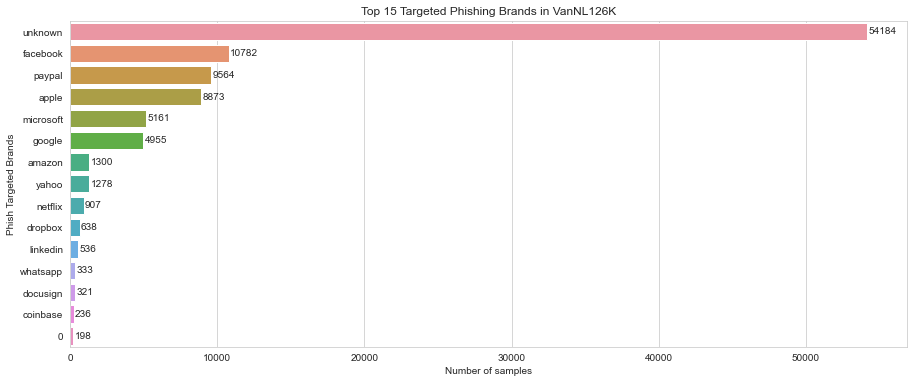

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

brands = phish_samples.brand.value_counts()[:15].index
values = phish_samples.brand.value_counts()[:15].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=brands, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Phish Targeted Brands')
plt.title("Top 15 Targeted Phishing Brands in VanNL126K")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

<hr></hr>

<a id='5' /> 
<h2>1.5 Detected Text Languages</h2>

In [38]:
trafilatura_langs_phish = phish_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_phish[:10]

English               67532
French                 5064
Vietnamese             4216
Portuguese             2809
Tagalog                2592
Spanish; Castilian     2194
German                 2127
Japanese               2109
Russian                1412
Polish                 1016
Name: trafilatura_text_language, dtype: int64

In [39]:
print('The total number of phishing languages (Trafilatura): ', len(trafilatura_langs_phish))

The total number of phishing languages (Trafilatura):  43


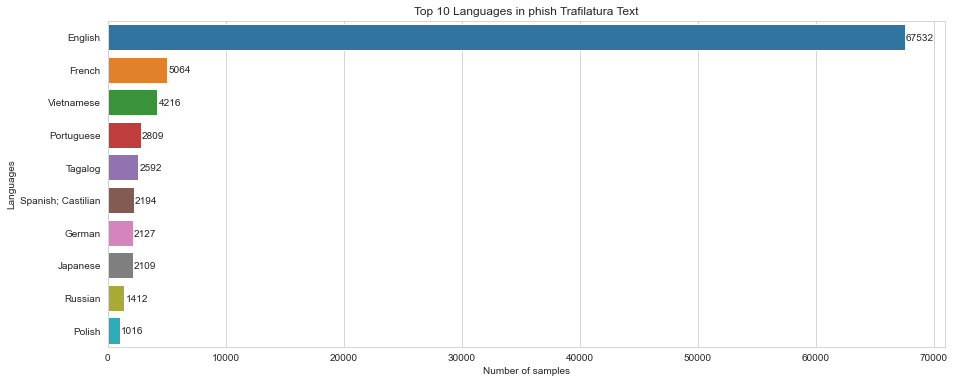

In [40]:
langs = trafilatura_langs_phish[:10].index
values = trafilatura_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [41]:
BeautifulSoup_langs_phish = phish_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_phish[:10]

English               67998
French                 5064
Vietnamese             4242
Portuguese             2992
German                 2537
Tagalog                2406
Spanish; Castilian     2221
Japanese               2106
Russian                1309
Polish                 1002
Name: BeautifulSoup_text_language, dtype: int64

In [42]:
print('The total number of phishing languages (BS): ', len(BeautifulSoup_langs_phish))

The total number of phishing languages (BS):  44


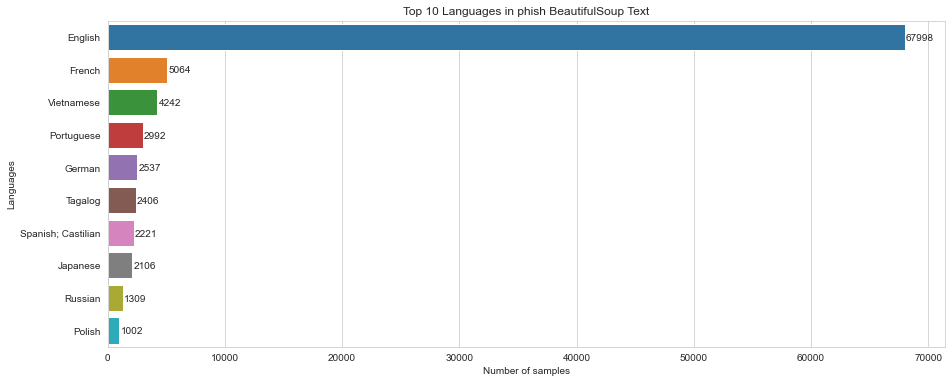

In [43]:
langs = BeautifulSoup_langs_phish[:10].index
values = BeautifulSoup_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


In [44]:
html_langs_phish = phish_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_phish[:10]

English               99026
Catalan; Valencian      378
French                  171
Welsh                    66
Bulgarian                51
Danish                   51
Spanish; Castilian       31
Polish                   30
Croatian                 25
Estonian                 21
Name: html_text_language, dtype: int64

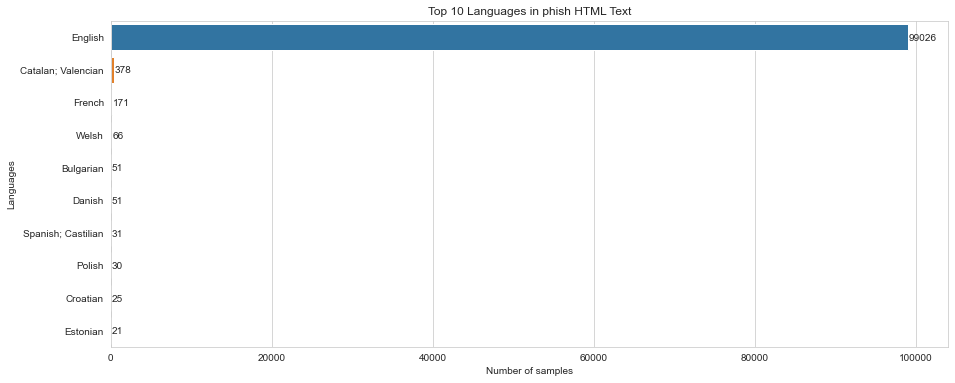

In [45]:
langs = html_langs_phish[:10].index
values = html_langs_phish[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in phish HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='6' /> 
<h2>1.6 SSL Distribution</h2>

In [46]:
phish_samples.SSL.value_counts()

False    55736
True     44264
Name: SSL, dtype: int64

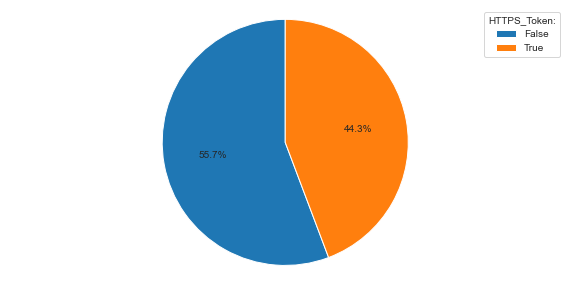

In [47]:
sizes = phish_samples.SSL.value_counts().values 
labels= phish_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='7' /> 
<h2>1.7 Top 10 TLD & Domains</h2>

In [48]:
phish_samples.Domain.value_counts()[:10]

000webhostapp    9662
gvirabi          3671
ryawqu           1243
webcindario      1221
siahxu            934
patraglobal       904
kylelierman       528
bit               511
hacheyou          496
16mb              403
Name: Domain, dtype: int64

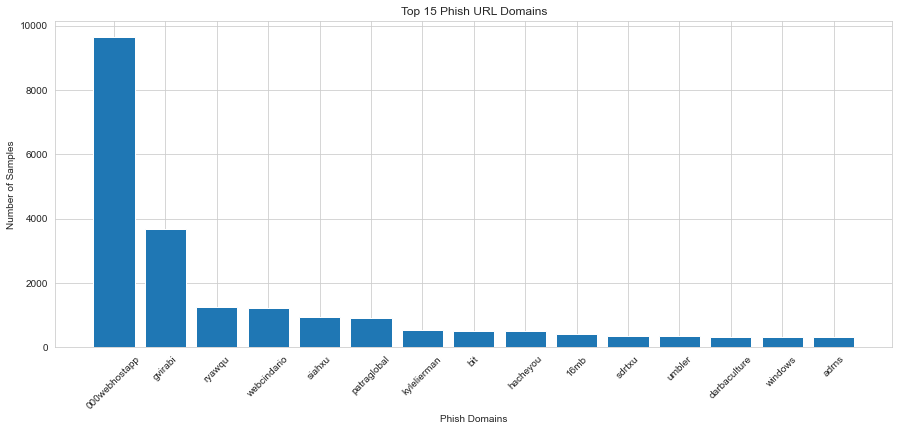

In [49]:
domains = phish_samples.Domain.value_counts()[:15].index
counts = phish_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Phish Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [50]:
phish_samples.TLD.value_counts()[:10]

com       54088
cn         4563
net        3612
org        2226
top        1825
ru         1804
com.br     1503
info       1369
xyz        1113
pl         1003
Name: TLD, dtype: int64

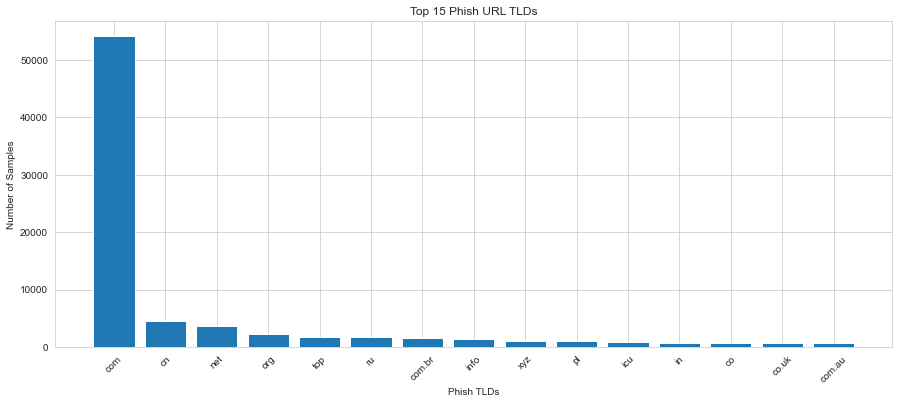

In [51]:
tlds = phish_samples.TLD.value_counts()[:15].index
counts = phish_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Phish TLDs")
plt.ylabel("Number of Samples")
plt.title("Top 15 Phish URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='8' /> 
<h2>1.8 URL Length Stats</h2>

In [52]:
print('Phish URL average length:', round(phish_samples.URL.str.len().sum()/sum(phish_samples.URL.notnull()), 4))
print('Phish URL min length:', phish_samples.URL.str.len().min())
print('Phish URL max length:', phish_samples.URL.str.len().max())
print('Phish URL median length:', phish_samples.URL.str.len().median())

Phish URL average length: 87.783
Phish URL min length: 13
Phish URL max length: 2107
Phish URL median length: 66.0


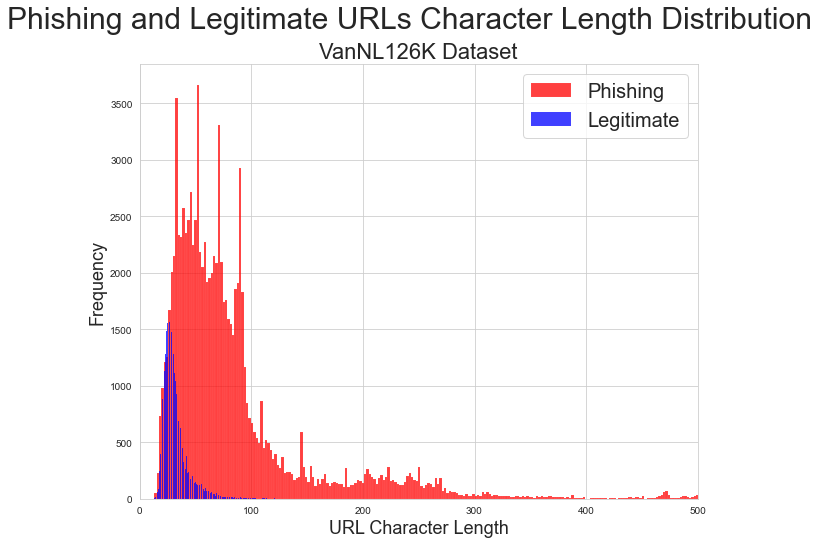

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

phish_samples['url_length'] = phish_samples.URL.str.len()
legit_samples['url_length'] = legit_samples.URL.str.len()

# Create a single subplot for VanNL126k
fig, ax = plt.subplots(figsize=(10, 8))

# Plot phishing dataset
sns.histplot(phish_samples['url_length'], color="red", label="Phishing", ax=ax)

# Plot legitimate dataset on top of phishing
sns.histplot(legit_samples['url_length'], color="blue", label="Legitimate", ax=ax)

title_fontsize = 22

# Set the title and axis labels for the subplot
ax.set_title('VanNL126K Dataset', fontsize=title_fontsize)
ax.set_xlabel('URL Character Length', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)

# Set the x-axis limit to 0-800 or adjust as needed
ax.set_xlim(0, 500)

# Add a legend to the subplot
ax.legend(fontsize=20)

# Set the main title
plt.suptitle("Phishing and Legitimate URLs Character Length Distribution", fontsize=30)

plt.show()


<hr></hr>

<a id='9' /> 
<h2>1.9 Top 10 FLD & Subdomains</h2>

In [54]:
phish_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,http://pulsagratisdarifbburuan.000webhostapp.c...,com,000webhostapp,000webhostapp.com,pulsagratisdarifbburuan
1,http://veeprhopharma.com/uploads-themes/d0083e...,com,veeprhopharma,veeprhopharma.com,None
2,https://latitude34gerroa.com.au/wp-admin/inclu...,com.au,latitude34gerroa,latitude34gerroa.com.au,None
3,http://trendcrush.info/wp-admin/bankofamerica/...,info,trendcrush,trendcrush.info,None
4,https://kirillkot123.000webhostapp.com,com,000webhostapp,000webhostapp.com,kirillkot123
5,https://www.dekorplanet.pl/override/classes/ba...,pl,dekorplanet,dekorplanet.pl,www
6,http://www.artsmooc.org/modules/forum/Support/...,org,artsmooc,artsmooc.org,www
7,http://apple.itunes.adrns.cn/mim/6y3f1w2467k98...,cn,adrns,adrns.cn,apple.itunes
8,http://www.tesla-3.com/e/,com,tesla-3,tesla-3.com,www
9,http://starsoftworld.com/coltsyds_dskujd/dc2dd...,com,starsoftworld,starsoftworld.com,None


In [55]:
print('the number of unique flds:', len(phish_samples.FLD.unique()))
phish_samples.FLD.value_counts()[:20]

the number of unique flds: 26850


000webhostapp.com    9662
gvirabi.com          3671
ryawqu.cn            1243
webcindario.com      1221
siahxu.cn             934
patraglobal.com       904
kylelierman.com       528
hacheyou.com          496
bit.ly                433
16mb.com              403
sdrtxu.cn             348
umbler.net            342
darbaculture.com      323
windows.net           319
adrns.cn              309
weebly.com            308
secureserver.net      308
adjoinshop.com        273
xsph.ru               267
k-idtech.com          260
Name: FLD, dtype: int64

In [56]:
print('the number of unique subdomains:', len(phish_samples.Subdomain.unique()))
phish_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 13653


www                            10085
facebook.com.https.s1           1423
www.apple.com                    679
el-gr.facebook.com.https.s1      617
fr-fr.facebook.com.https.s1      569
paypal.co.uk                     486
apple.com                        463
www.itunes.mail                  420
www.apple.lnc                    369
az-az.facebook.com.https.s1      342
mail                             339
katibu                           323
www.facebook.com.https.s1        307
apple.lnc                        291
www.itunes.find                  258
itunes.mail                      204
www.apple.icloud                 194
attfc                            187
secure.runescape                 177
cafecitoperez                    169
Name: Subdomain, dtype: int64

In [57]:
phish_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,100000,98671,98671,98670,51001
unique,100000,673,25913,26849,13652
top,http://pulsagratisdarifbburuan.000webhostapp.c...,com,000webhostapp,000webhostapp.com,www
freq,1,54088,9662,9662,10085


<hr></hr>

<hr></hr>

<a id='legit' /> 
<center>
  <h2 id="legit-samples" style="color:red">2. Legit samples</h2>
</center>


<a id='11' /> 
<h2>2.1 Reading Legit pa parquet file</h2>

In [58]:
%%time
legit_samples = pd.read_parquet('path/to/VanNL126k_legit.parquet')

CPU times: total: 16.8 s
Wall time: 11.8 s


In [59]:
legit_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25938 entries, 0 to 25937
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   dataset_name                 25938 non-null  object
 1   folder_name                  25938 non-null  object
 2   Class                        25938 non-null  object
 3   brand                        25938 non-null  object
 4   URL                          25938 non-null  object
 5   TLD                          25938 non-null  object
 6   Domain                       25938 non-null  object
 7   FLD                          25938 non-null  object
 8   Subdomain                    23731 non-null  object
 9   SSL                          25938 non-null  bool  
 10  image_path                   22279 non-null  object
 11  trafilatura_text             21505 non-null  object
 12  trafilatura_text_language    21371 non-null  object
 13  translated_bs_text           21

In [60]:
legit_samples.head(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
0,VanNL126k,0002e9ee794997be56d7b06487af23a9eb1b20f33e7144...,legit,unknown,http://www.blackcatpc.co.uk/,co.uk,blackcatpc,blackcatpc.co.uk,www,False,...,Welcome to Black Cat PC - Dell Laptop Spares -...,English,\n\nWelcome to Black Cat PC - Providing Dell P...,\n\nWelcome to Black Cat PC - Providing Dell P...,English,______Menu\n\n * ______ Menu \n\nBack\n\n * ...,\n \n \n\nWelcome to Black Cat PC - Providin...,Welcome to Black Cat PC - Providing Dell Parts...,"<!DOCTYPE html><html class=""js svg supports cs...",English
1,VanNL126k,0004ad3c6341a1c60648e785e80e1be678d8e41573ed1f...,legit,unknown,http://incomune.interno.it/statuti/statuti/cas...,it,interno,interno.it,incomune,False,...,Servizio sospeso\nLa sua richiesta è stata blo...,Italian,Suspended service |Ministry of the Interior\n\...,\nServizio sospeso | Ministero dell'Interno\n\...,Italian,![](/images_failover2/background.jpeg)\n\n ![]...,\n Servizio sospeso | Ministero dell'Inte...,Servizio sospeso | Ministero dell'Interno\n\nG...,"<!DOCTYPE html><html lang=""en"" dir=""ltr""><head...",Italian
2,VanNL126k,000f9f0d447bbe60b53d579a3294600582c75d3e1bd6f0...,legit,unknown,http://www.aquasurvey.com/,com,aquasurvey,aquasurvey.com,www,False,...,We're here to help:\nFlash is required to view...,English,\n\n\n\n\n\n\n\n\n\n\n\n\nAqua Survey | Home P...,\n\n\n\n\n\n\n\n\n\n\n\n\nAqua Survey | Home P...,English,"\n\n[Aqua Survey](/)\n\n# Aqua Survey, Inc.\n\...",\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\nAqua Survey...,Aqua Survey | Home Page\n\nAqua Survey\n\nAqua...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",English
3,VanNL126k,0015af48d9478dd8e6f7a542fc0c12b519dd0c76a50a7d...,legit,unknown,http://www.ricoh.ie/,ie,ricoh,ricoh.ie,www,False,...,None,None,None,None,None,None,None,None,None,None
4,VanNL126k,001a877e1a180a4bb9ec75905cf68891a93825caff9491...,legit,unknown,http://www.ibs-wolfen.de/,de,ibs-wolfen,ibs-wolfen.de,www,False,...,None,None,None,None,None,None,None,None,<html><head></head><body></body></html>,Welsh
5,VanNL126k,00232cf4dcfa40375e01bf91312c5fda90debc4c44cd90...,legit,unknown,http://www.cofamo.it/,it,cofamo,cofamo.it,www,False,...,"I servizi di Facchinaggio, Trasporti, Trasloch...",Italian,"Cofamo - Logistics, porterage, transport, remo...","\n\n\nCOFAMO - Logistica, Facchinaggio, Traspo...",Italian,\n\n * [Chi siamo](/it/chi-siamo.php)\n * Se...,"\n\n\nCOFAMO - Logistica, Facchinaggio, Traspo...","COFAMO - Logistica, Facchinaggio, Trasporti, T...","<!DOCTYPE html><html><head>\n<meta charset=""ut...",English
6,VanNL126k,00270eae3d7b13fdc752e27ab7a872a9402de5f61e28b6...,legit,unknown,http://www.wl.cn/,cn,wl,wl.cn,www,False,...,￥ 19.90\n￥ 19.90\n￥ 18.60\n￥ 9.80\n￥ 32.00\n￥ ...,None,\n\n\n\n\n\n\n蔚蓝网|蔚蓝图书网-买书就上蔚蓝网上书店\n\n\n\n\n\n...,\n\n\n\n\n\n\n蔚蓝网|蔚蓝图书网-买书就上蔚蓝网上书店\n\n\n\n\n\n...,None,\n\n[收藏蔚蓝](javascript:;) 您好，欢迎来到蔚蓝网！ 请[[登录](ja...,\n\t\n\n\n\n\n\n \n\n\n \t蔚蓝网|蔚蓝图书网-买书就上蔚蓝网上书...,蔚蓝网|蔚蓝图书网-买书就上蔚蓝网上书店\n\n收藏蔚蓝 您好，欢迎来到蔚蓝网！ 请[ 登录...,"<!DOCTYPE html><html class=""ks-webkit601 ks-we...",English
7,VanNL126k,002df4fa95a8cd70511a98a560f6313f1c825b6f88e516...,legit,unknown,http://www.qzyuan.com/,com,qzyuan,qzyuan.com,www,False,...,None,None,None,None,None,None,None,None,None,None
8,VanNL126k,002f7054862b2083d424a383f0243a0807d71e821bb824...,legit,unknown,http://www.technology.cz/,cz,technology,technology.cz,www,False,...,Nová PRATIKA 56 MPE X1 a X2\n3. 7. 2020\nNové ...,Czech,\nTechnology - svět balení\n\n \n\n\n\n\n\n \n...,\nTechnology - svět balení\n\n \n\n\n\n\n\n \n...,Czech,\n\n[![](/obj/files//11/sys_media_21021.svg)](...,\n\tTechnology - svět balení\n\t\n \n\t\n\n\n...,Technology - svět balení\n\nMenu\n+420 483 360...,"<!DOCTYPE html><html lang=""cs""><head>\n\t<titl...",English
9,VanNL126k,0030787a03e987a6524e

In [61]:
legit_samples.tail(10)

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
25928,VanNL126k,ffe984f9d38828b39f6447ab68e5246b6cf36b9576a415...,legit,unknown,http://www.prima-leben-und-stereo.de/,de,prima-leben-und-stereo,prima-leben-und-stereo.de,www,False,...,Cookie Policy\nCookies helfen uns bei der Bere...,German,Great life and stereo\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\n\n\n\nPrima leben und stereo\n\n\n\n\n\n...,German,Cookie PolicyCookies helfen uns bei der Bereit...,\n\t\n\t\n\t\n\t\n\t\nPrima leben und stereo\n...,Prima leben und stereo\n\nCookie Policy\nCooki...,"<!DOCTYPE html><html class=""js"" lang=""de-DE"" i...",English
25929,VanNL126k,ffea6e49e5861718ead07e5500022d07d0ddaad4b60c15...,legit,unknown,http://www.domanice.i-gmina.pl/,pl,i-gmina,i-gmina.pl,www.domanice,False,...,None,None,None,None,None,\n *[19 juillet]: 2020-07-19T06:45:00Z\n *[1...,None,None,None,None
25930,VanNL126k,ffeb579fbfb8e18992d675b900af0037c0d7a6847f6d1a...,legit,unknown,http://miltonumc.weebly.com/,com,weebly,weebly.com,miltonumc,False,...,"All the details for church are found on the ""O...",English,\nMilton United Methodist Church - Home\n\n\n\...,\nMilton United Methodist Church - Home\n\n\n\...,English,[ ![Milton United Methodist Church](/uploads/4...,\n\t\tMilton United Methodist Church - Home\n\...,Milton United Methodist Church - Home\n\nHome\...,"<!DOCTYPE html><html lang=""en""><head><script a...",English
25931,VanNL126k,fff223400a95f7bf6675fdb7e1d3d1bb0f1a7acd0ac6b2...,legit,unknown,http://gocalifornia.about.com/bl_wa_st_map.htm,com,about,about.com,gocalifornia,False,...,None,None,None,None,None,\n *[19 juillet]: 2020-07-19T06:45:00Z\n *[1...,None,None,None,None
25932,VanNL126k,fff4d1e6a80d12868baf14fa037936a981c67a9eb775a9...,legit,unknown,http://www.kaztou.com/,com,kaztou,kaztou.com,www,False,...,NEXT>>\n弾き語り教室\nテレビ・映画・歌手・CM・舞台ｅｔｃ…オーディション無料\n...,Japanese,Acoustic Live House Higashikadenji Katou's hom...,\n\n\n\n\n\n\nアコースティックライブハウス東高円寺カットウのホームページ\n\...,Japanese,| | | | **[NEXT>>](index_2.html)** \n---|-...,\n\n\n\n\n\n\nアコースティックライブハウス東高円寺カットウのホームページ\n\...,アコースティックライブハウス東高円寺カットウのホームページ\n\nNEXT>>\n弾き語り教...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T...",English
25933,VanNL126k,fff5ae0cef4f9f605e90d0bd6bc7f313dcdb5cad33e24c...,legit,unknown,http://www.tucsonaz.gov/police,gov,tucsonaz,tucsonaz.gov,www,False,...,Read Chief Magnus' guest column in the Arizona...,English,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTucson P...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nTucson P...,English,\n\nJump to navigation\n\n## Search form\n\nSe...,\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n Tucs...,Tucson Police Department | Official website of...,<!DOCTYPE html><!--[if IEMobile 7]><html class...,English
25934,VanNL126k,fff8754cbcac7ae671485f10a66836fd049634ea6dad29...,legit,unknown,http://www.eldis.org/go/country-profiles?objec...,org,eldis,eldis.org,www,False,...,None,None,None,None,None,\n *[19 juillet]: 2020-07-19T06:45:00Z\n *[1...,None,None,<html><head></head><body></body></html>,Welsh
25935,VanNL126k,fff9adc352fc58a3f7e9312ac2752db3f2a19da6b4838c...,legit,unknown,http://www.heathercolegatto.com/,com,heathercolegatto,heathercolegatto.com,www,False,...,"Home\nWelcome to my visionary home, the place ...",English,\nHeather Cole Gatto: Home\n\n\n\n\n\n\n\n\n\n...,\nHeather Cole Gatto: Home\n\n\n\n\n\n\n\n\n\n...,English,\n\n# Heather Cole Gatto\n\n![Heather Cole Gat...,\nHeather Cole Gatto: Home\n\n\n\n\n \n\n\n\n\...,Heather Cole Gatto: Home\n\nHeather Cole Gatto...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",English
25936,VanNL126k,fffb4e6b8e85a8a189b4b375fb3cc1441347193add38a7...,legit,unknown,http://www.fdo-ds.co.jp/akaneya/,co.jp,fdo-ds,fdo-ds.co.jp,www,False,...,|\n|\n|\n|\n|\n|\n|竹炭を使用したいけれど、どの様な用途に使えば良いのか分...,Japanese,\n茜屋竹炭本舗｜竹炭と竹酢液の通販専門店。本物だけを全国にお届け\n\n\n\n\n\n\.

In [62]:
legit_samples.describe()

,dataset_name,folder_name,Class,brand,URL,TLD,Domain,FLD,Subdomain,SSL,...,trafilatura_text,trafilatura_text_language,translated_bs_text,BeautifulSoup_text,BeautifulSoup_text_language,html2text_text,lxml_text,html_extract_text,full_html,html_text_language
count,25938,25938,25938,25938,25938,25938,25938,25938,23731,25938,...,21505,21371,21522,21522,21390,25916,21499,21491,22283,22283
unique,1,25938,1,1,25938,559,22022,22224,2576,2,...,20776,45,21116,21134,45,21442,21130,21067,21419,29
top,VanNL126k,0002e9ee794997be56d7b06487af23a9eb1b20f33e7144...,legit,unknown,http://www.blackcatpc.co.uk/,com,wikipedia,wikipedia.org,www,False,...,The Sponsored Listings displayed above are ser...,English,Notice of service end\n\n\n\n\n\n\n\n\n\n\n\n\...,\n\n\n\n\n\nサービス終了のお知らせ\n\n\n\n\n\n\n\n\n\n\n\...,English,\n *[19 juillet]: 2020-07-19T06:45:00Z\n *[1...,\n\n\n\n\n\n\n \n サービス終了のお知らせ\n \n \n \n\...,サービス終了のお知らせ\n\nYahoo! JAPAN\n\nサービス終了のお知らせ\n\n...,<html><head></head><body></body></html>,English
freq,25938,1,25938,25938,1,9872,292,292,19982,25571,...,73,11362,46,46,11365,116,46,46,673,20513


<hr></hr>

<a id='22' /> 
<h2>2.2 Missing Data</h2>

In [63]:
print('the number of missing HTML files (legit):', sum(legit_samples.full_html.isnull()))
print('the number of missing URLs (legit):', sum(legit_samples.URL.isnull()))
print('the number of missing images (legit):', sum(legit_samples.image_path.isnull()))

the number of missing HTML files (legit): 3655
the number of missing URLs (legit): 0
the number of missing images (legit): 3659


<hr></hr>

<a id='33' /> 
<h2>2.3 Average Text Length</h2>

In [64]:
print('the average legit HTML code text length:', round(legit_samples.full_html.str.len().sum() / sum(legit_samples.full_html.notnull()), 1))
print('the average legit trafilatura text length:', round((legit_samples.trafilatura_text.str.len().sum() / sum(legit_samples.trafilatura_text.notnull())),1))
print('the average legit BeautifulSoup text length:', round(legit_samples.BeautifulSoup_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
print('the average legit html2text text length:', round(legit_samples.html2text_text.str.len().sum() / sum(legit_samples.html2text_text.notnull()), 1))
print('the average legit html_extract text length:', round(legit_samples.html_extract_text.str.len().sum() / sum(legit_samples.html_extract_text.notnull()), 1))
print('the average legit lxml_text text length:', round(legit_samples.lxml_text.str.len().sum() / sum(legit_samples.lxml_text.notnull()), 1))


the average legit HTML code text length: 96683.6
the average legit trafilatura text length: 2878.9
the average legit BeautifulSoup text length: 6444.5
the average legit html2text text length: 47887.0
the average legit html_extract text length: 5751.0
the average legit lxml_text text length: 30232.4


<hr></hr>

<a id='44' /> 
<h2>2.4 Legit Brand Distribution</h2>

In [65]:
#there are no legitimate brand data
legit_samples.brand.value_counts()

unknown    25938
Name: brand, dtype: int64

<hr></hr>

<a id='55' /> 
<h2>2.5 Detected Text Languages</h2>

In [66]:
trafilatura_langs_legit = legit_samples.trafilatura_text_language.value_counts()

# top 10 languages detected in trafilatura text
trafilatura_langs_legit[:10]

English               11362
German                 2875
French                 1213
Japanese               1103
Italian                 786
Russian                 668
Spanish; Castilian      636
Dutch; Flemish          541
Polish                  351
Turkish                 204
Name: trafilatura_text_language, dtype: int64

In [67]:
print('The total number of legitimate languages (trafilatura): ', len(trafilatura_langs_legit))

The total number of legitimate languages (trafilatura):  45


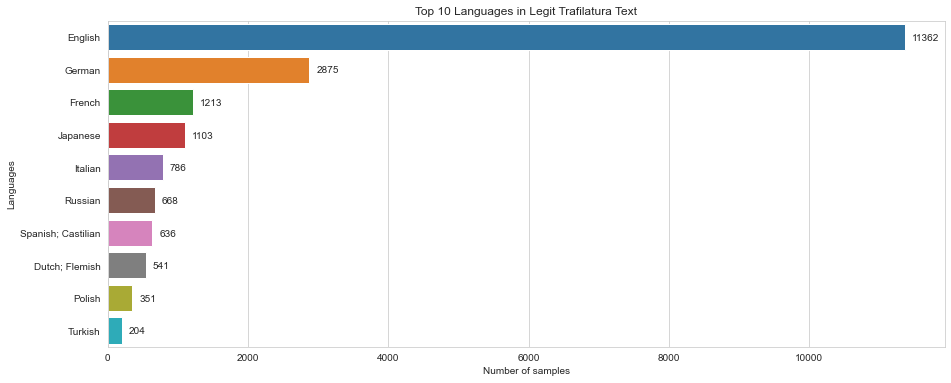

In [68]:
langs = trafilatura_langs_legit[:10].index
values = trafilatura_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit Trafilatura Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [69]:
BeautifulSoup_langs_legit = legit_samples.BeautifulSoup_text_language.value_counts()

# top 10 languages detected in BeautifulSoup text
BeautifulSoup_langs_legit[:10]

English               11365
German                 2880
French                 1238
Japanese               1117
Italian                 792
Russian                 673
Spanish; Castilian      625
Dutch; Flemish          531
Polish                  354
Turkish                 209
Name: BeautifulSoup_text_language, dtype: int64

In [70]:
print('The total number of legitimate languages (BS): ', len(BeautifulSoup_langs_legit))

The total number of legitimate languages (BS):  45


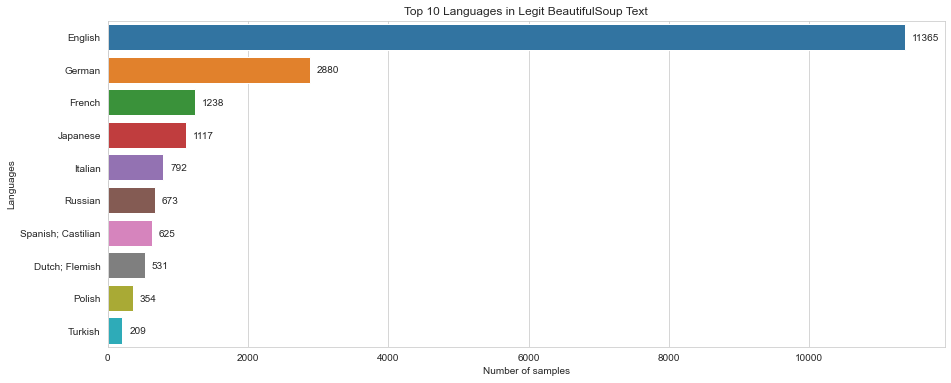

In [71]:
langs = BeautifulSoup_langs_legit[:10].index
values = BeautifulSoup_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit BeautifulSoup Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()

In [72]:
html_langs_legit = legit_samples.html_text_language.value_counts()

# top 10 languages detected in html text
html_langs_legit[:10]

English               20513
Welsh                   695
French                  267
German                  261
Catalan; Valencian       90
Italian                  80
Spanish; Castilian       60
Dutch; Flemish           52
Estonian                 40
Polish                   38
Name: html_text_language, dtype: int64

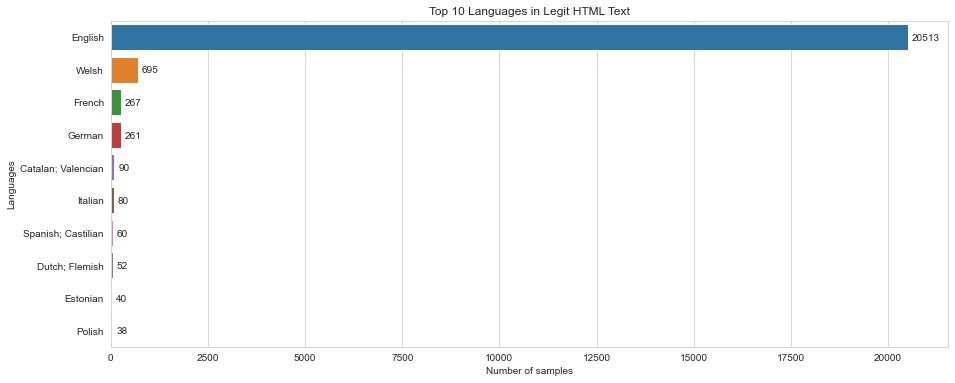

In [73]:
langs = html_langs_legit[:10].index
values = html_langs_legit[:10].values

# Create the plot
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
plot = sns.barplot(x=values, y=langs, orient='h')

# Add labels and title
plt.xlabel('Number of samples')
plt.ylabel('Languages')
plt.title("Top 10 Languages in Legit HTML Text")
# Add numbers over the bars
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width()+100, p.get_y()+0.5))
    
# Show the plot
plt.show()


<hr></hr>

<a id='66' /> 
<h2>2.6 SSL Distribution</h2>

In [74]:
legit_samples.SSL.value_counts()

False    25571
True       367
Name: SSL, dtype: int64

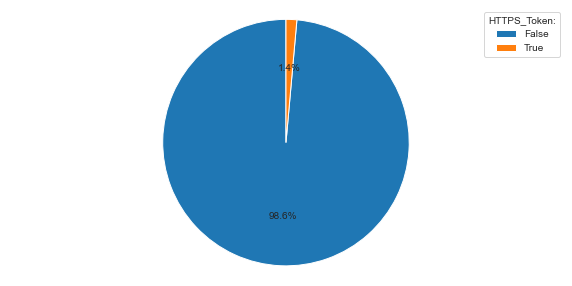

In [75]:
sizes = legit_samples.SSL.value_counts().values 
labels= legit_samples.SSL.value_counts().index 
fig=plt.figure(figsize=(10, 5))
plt.pie(sizes, startangle = 90, autopct = '%1.1f%%')
plt.legend(labels, title = 'HTTPS_Token:')
plt.axis('equal')

plt.show()

<hr></hr>

<a id='77' /> 
<h2>2.7 Top 10 TLD & Domains</h2>

In [76]:
legit_samples.Domain.value_counts()[:10]

wikipedia       292
tripod          191
angelfire       153
free            132
meb             113
newadvent       110
imdb             93
yahoo            92
wunderground     59
geocities        56
Name: Domain, dtype: int64

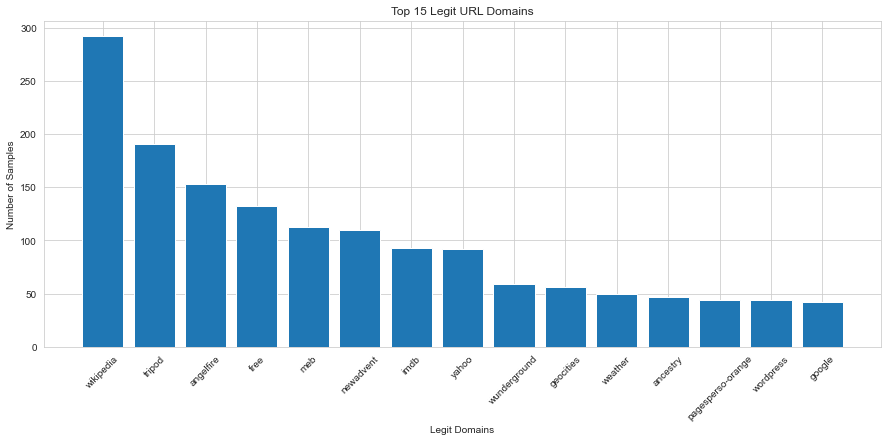

In [77]:
domains = legit_samples.Domain.value_counts()[:15].index
counts = legit_samples.Domain.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(domains, counts)

# Add labels and title
plt.xlabel("Legit Domains")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL Domains")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [78]:
legit_samples.TLD.value_counts()[:10]

com      9872
de       2703
org      2405
co.uk    1015
net       808
it        718
ru        627
fr        574
nl        507
edu       462
Name: TLD, dtype: int64

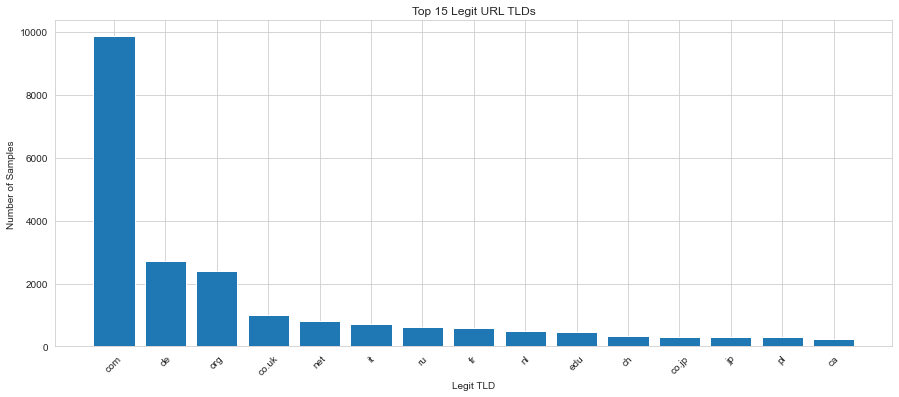

In [79]:
tlds = legit_samples.TLD.value_counts()[:15].index
counts = legit_samples.TLD.value_counts()[:15].values

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the bar plot
plt.bar(tlds, counts)

# Add labels and title
plt.xlabel("Legit TLD")
plt.ylabel("Number of Samples")
plt.title("Top 15 Legit URL TLDs")

# Rotate the x-tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<hr></hr>

<a id='88' /> 
<h2>2.8 URL Length Stats</h2>

In [80]:
print('Legit URL average length:', round(legit_samples.URL.str.len().sum()/sum(legit_samples.URL.notnull()), 4))
print('Legit URL min length:', legit_samples.URL.str.len().min())
print('Legit URL max length:', legit_samples.URL.str.len().max())
print('Legit URL median length:', legit_samples.URL.str.len().median())

Legit URL average length: 32.2004
Legit URL min length: 13
Legit URL max length: 246
Legit URL median length: 29.0


<hr></hr>

<a id='99' /> 
<h2>2.9 Top 10 FLD & Subdomains</h2>

In [81]:
legit_samples.iloc[:, 4:9].head(10)

,URL,TLD,Domain,FLD,Subdomain
0,http://www.blackcatpc.co.uk/,co.uk,blackcatpc,blackcatpc.co.uk,www
1,http://incomune.interno.it/statuti/statuti/cas...,it,interno,interno.it,incomune
2,http://www.aquasurvey.com/,com,aquasurvey,aquasurvey.com,www
3,http://www.ricoh.ie/,ie,ricoh,ricoh.ie,www
4,http://www.ibs-wolfen.de/,de,ibs-wolfen,ibs-wolfen.de,www
5,http://www.cofamo.it/,it,cofamo,cofamo.it,www
6,http://www.wl.cn/,cn,wl,wl.cn,www
7,http://www.qzyuan.com/,com,qzyuan,qzyuan.com,www
8,http://www.technology.cz/,cz,technology,technology.cz,www
9,http://www.stadtpark-mannheim.de/,de,stadtpark-mannheim,stadtpark-mannheim.de,www


In [82]:
print('the number of unique fld:', len(legit_samples.FLD.unique()))
legit_samples.FLD.value_counts()[:20]

the number of unique fld: 22224


wikipedia.org           292
tripod.com              191
angelfire.com           153
free.fr                 132
newadvent.org           110
meb.k12.tr               97
imdb.com                 93
yahoo.com                86
wunderground.com         59
weather.com              47
ancestry.com             47
pagesperso-orange.fr     44
wordpress.com            44
geocities.jp             42
narod.ru                 41
facebook.com             39
google.com               39
fc2.com                  36
bbc.co.uk                35
sourceforge.net          32
Name: FLD, dtype: int64

In [83]:
print('the number of unique subdomains:', len(legit_samples.Subdomain.unique()))
legit_samples.Subdomain.value_counts()[:20]

the number of unique subdomains: 2577


www             19982
en                150
members            83
groups             55
www.comune         51
home               46
de                 43
fr                 41
tools              31
www.rootsweb       30
sites              29
web                29
news               28
blog               26
incomune           25
digilander         25
users              21
www.cs             20
xoomer             17
www2               16
Name: Subdomain, dtype: int64

In [84]:
legit_samples.iloc[:, 4:9].describe()

,URL,TLD,Domain,FLD,Subdomain
count,25938,25938,25938,25938,23731
unique,25938,559,22022,22224,2576
top,http://www.blackcatpc.co.uk/,com,wikipedia,wikipedia.org,www
freq,1,9872,292,292,19982


## Key Findings & Quality Assessment

### Uniqueness Analysis
- **URL Uniqueness:** High/Low (Refer to 1.8)
- **Content Uniqueness:** High/Low (Refer to describes)

> **Observation:** Compare the `unique` counts in the `df.describe()` outputs above. A significant drop from URL unique count to Content (HTML/Text) unique count indicates data redundancy.

### Multimodal Integrity
- Check for non-null values in `trafilatura_text`, `BeautifulSoup_text`, and `image_path` columns in Section 1.1 and 2.1.
